In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df = df.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1)

label_encoder = LabelEncoder()
df['Male'] = label_encoder.fit_transform(df['Male'])

In [5]:
X = df.drop('Clicked on Ad', axis=1)
y = df['Clicked on Ad']

In [6]:
def train_random_forest(X, y, dataset_name, n_estimators=5):
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=n_estimators, criterion='gini', random_state=42)
    rf.fit(X_train, y_train)

    # Predictions
    y_pred = rf.predict(X_test)

    # Compute Performance Metrics
    acc = accuracy_score(y_test, y_pred)
    print(f'Performance on {dataset_name} dataset:')
    print(f'Accuracy: {acc:.4f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Plot individual trees
    fig, axes = plt.subplots(1, n_estimators, figsize=(15, 5))
    for i, tree in enumerate(rf.estimators_):
        plot_tree(tree, filled=True, ax=axes[i])
        axes[i].set_title(f'Tree {i+1}')
    plt.show()

Performance on Advertising dataset:
Accuracy: 0.9300
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        89
           1       0.93      0.95      0.94       111

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



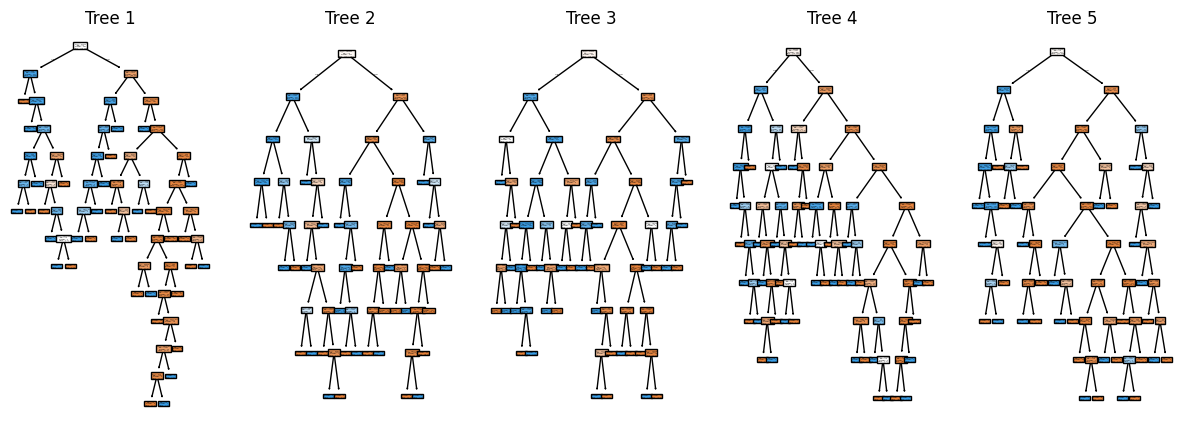

In [10]:
train_random_forest(X, y, 'Advertising')